__AUTHORS__ = Elia Mercatanti, Matteo Gemignani

__EMAIL__ = elia.mercatanti@stud.unifi.it, matteo.gemignani@stud.unifi.it

# <center> Progetto di Analysis of Algorithms and Data Structures - 2018/2019 </center>
# <center> - Coefficienti Centrali delle Matrici di Riordan - </center>

Lo scopo di questo Notebook è quello di riprodurre alcuni risultati presentati in "On the Central Coefficients of Riordan Matrices" (Paul Barry, 2013), disponibile a questo [link](https://cs.uwaterloo.ca/journals/JIS/VOL16/Barry1/barry242.html), attraverso la libreria di Python *Sympy* per l'utlizzo del metodo simbolico.
In particolare, utilizzeremo il teorema di inversione di Lagrange per caratterizzare la funzione generatrice dei coefficienti centrali degli elementi di matrici di Riordan. Applicheremo il risultato ottenuto per calcolare la funzione generatrice dei coefficienti centrali di alcuni arrays di Riordan definiti da espressioni razionali e irrazionali.

## Definizioni su Sequenze di Interi, Inversione di Lagrange e Array di Riordan

### Funzione Generatrice e Operatore "Coefficente di"

Per una sequenza di interi $a_n$, che è un elemento di $\mathbb{Z}^\mathbb{N}$, la serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ è chiamata *funzione generatrice* o f.g. della sequenza. $a_n$ è dunque il coefficiente di $t^n$ in questa serie. Rappresentiamo questo con $a_n=[t^n]f(t)$. Per esempio, $F_n=[t^n]\frac{t}{1-t-t^2}$ è l'$n$-esimo numero di Fibonacci, mentre $C_n=[t^n]\frac{1-\sqrt{1-4t}}{2t}$ è l'$n$-esimo numero di Catalan. 

### Inversa Composizionale
Per una serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ con $f(0)=0$ e $f'(0)\neq0$ definiamo la *reversione* o l'*inversa composizionale* di $f$ come la serie di potenze $\bar{f}(t)$ (anche scritta $f^{[-1]}(t)$) tale che:

<a name="inversa">  </a>
\begin{equation}
f(\bar{f}(t))=t
\end{equation}

### Teorema di Inversione di Lagrange

Supponiamo che una serie formale di potenze $w=w(t)$ è implicitamente definita dalla relazione $w=t\phi(w)$, dove $\phi(w)$ è una serie formale di potenze tale che $\phi(0)=0$. Quindi, per qualsiasi serie formale di potenze $F(t)$,

\begin{equation}
[t^n]F(w(t))=\frac{1}{n}[t^{n-1}]F'(t)(\phi(t))^n
\end{equation}

###  Riordan Array <a name="riordan">  </a>
Un array di Riordan è una coppia $D=\mathcal{R}(d(t), h(t))$, dove $d(t)$ e $h(t)$ sono due serie di potenze formali (due funzioni generatrici) tali che $d(0)\neq0$ e $h(0)\neq0$. La coppia definisce una matrice triangolare inferiore infinita $(d_{n,k})_{n,k\in\mathbb{N}}$, dove:

\begin{equation}
d_{n,k}=[t^n]d(t)(h(t))^k
\end{equation}

## Teorema per il Calcolo della Funzione Generatrice dei Coefficienti Centrali di una Matrice di Riordan

Sia $(d(t),h(t))=(d(t),tf(t))$ un elemento del gruppo di matrici di Riordan $\mathcal{R}$ (con $f(0)\neq0$). Sia $d_{n,k}$ l'$(n,k)$-esimo elemento di questa matrice, e sia $v(t)$ la seguente serie di potenze (con $v(0)\neq0$):

<a name="v">  </a>
\begin{equation}
v(t)=\overline{\left(\frac{t}{f(t)}\right)}.
\end{equation}

Dunque la funzione generatrice della sequenza di termini centrali $d_{2n,n}$ è data da:

<a name="d2nn">  </a>
\begin{equation}
\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t).
\end{equation}

## Esempio con Espressioni Razionali

Per prima cosa, importiamo la libreria Sympy che verrà utilizzata per il calcolo simbolico più alcune altre librerie per stampare in modo accurato le espressioni matematiche che utilizzeremo.

In [1]:
from sympy import init_printing
from sympy import Lambda, Eq, solve, diff, simplify, series, zeros, Matrix
from sympy.abc import t, v
import numpy as np

Utiliziamo la seguente funzione per stampare graficamente in modo accurato le espressioni matematiche che utilizzeremo.

In [2]:
init_printing()

Prendiamo in considerazione la seguente coppia di funzioni generatrici $d(t)=\frac{1}{1-2t}$ e $f(t)=\frac{1-2t}{1-3t}$.

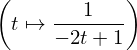

In [3]:
d = Lambda(t, 1/(1-2*t))
d

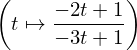

In [4]:
f = Lambda(t, (1-2*t)/(1-3*t))
f

Che formano una matrice di Riordan $\mathcal{R}(d(t), tf(t))$ (([3](#riordan)).

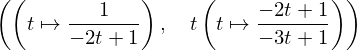

In [5]:
(d, t*f)

I coefficenti centrali di questa matrice iniziano con 1, 3, 15, 90, 579, 3858, ..., vediamo dunque come calcolarli utilizzando i teoremi e le definizioni presentate precedentemente.

Dobbiamo sostanzialmente applicare il Teorema per il calcolo della funzione generatrice dei coefficienti centrali di una matrice di riordan, e dunque per prima cosa dobbiamo ricavare la funzione $v(t)$ definita in ([4](#v)). Che nel nostro esempio risulta quindi uguale a

\begin{equation*}
v(t)=\overline{\left(\frac{t}{f(t)}\right)}=\overline{\left(\frac{t(1-3t)}{1-2t}\right)}.
\end{equation*}

Per ricavare dunque $v(t)$ in forma esplicita dovremo calcolarci l'inversa composizionale di $\frac{t(1-3t)}{1-2t}$ applicando la definizione vista in ([1](#inversa)). Quindi $v(t)$ è la soluzione apropriata (con $v(0)=0$) della seguente equazione:

\begin{equation*}
\frac{v(1-3v)}{1-2v}=t.
\end{equation*}

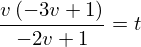

In [6]:
equation = Eq(v*(1-3*v)/(1-2*v), t)
equation

Risolviamo l'equazione:

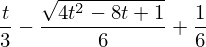

In [7]:
sol = solve(equation, v)
sol[0]

Troviamo dunque che la soluzione corretta è:

\begin{equation*}
v(t)=\frac{1+2t-\sqrt{1-8t+4t^2}}{6}.
\end{equation*}

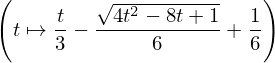

In [8]:
v = Lambda(t, sol[0])
v

A questo punto non ci resta che applicare il principale risultato del teorema, ovvero, per trovare la funzione generatrice $d_{2n,n}$ dei coefficienti centrali basterà calcolare la formula ([5](#d2nn)), nel nostro esempio con

\begin{equation*}
\frac{d(t)}{f(t)}=\frac{1-3t}{(1-2t)^2}.
\end{equation*}

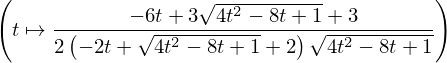

In [9]:
d_2n_n = Lambda(t, d(v(t))/f(v(t)) * diff(v(t), t))
d_2n_n = simplify(d_2n_n)
d_2n_n

Troviamo dunque che la funzione generatrice $d_{2n,n}$ è data da:

\begin{equation}
d_{2n,n}=\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t)=\frac{1+2t+\sqrt{1-8t+4t^2}}{2\sqrt{1-8t+4t^2}}.
\end{equation}

Che in forma in serie di potenze diventa:

In [10]:
fg = series(d_2n_n(t), t, n=10)
fg

E in questa forma è facilmente osservabile come i primi coefficenti di tale serie siano effettivamente 1, 3, 15, 90, 579, 3858, ... 

Per una prova finale possiamo stampare la matrice di Riordan corrispondente alle due funzioni generatrici scelte ($d(t)$ e $f(t)$) e verificare che i suoi coefficenti centrali siano effetivamente quelli indicata dalla funzione generatrice $d_{2n,n}$ appena calcolata. Calcoliamo dunque tale matrice limitandoci ad un numero di righe e colonne pari a $n$, definito qui sotto.

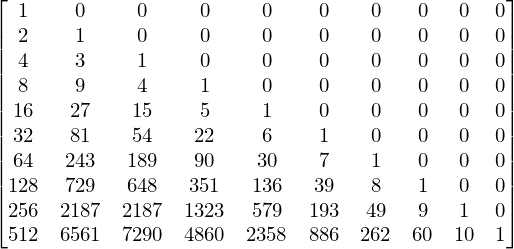

In [11]:
n = 10
matrix = zeros(n)
for column in range(n):
    d_n_k = Lambda(t, d(t)*(t*f(t))**column)
    a_n = series(d_n_k(t), t, n=n)
    for row in range(n):
        matrix[row, column] = a_n.coeff(t, n=row)
matrix

Se riportiamo i termini della matrice precedente ad una forma a "piramide" possiamo scovare agilmente i coefficenti centrali di tale matrice. Tali termini infatti sono tutti quelli che sono presenti nella colonna centrale e più "alta" di numeri.

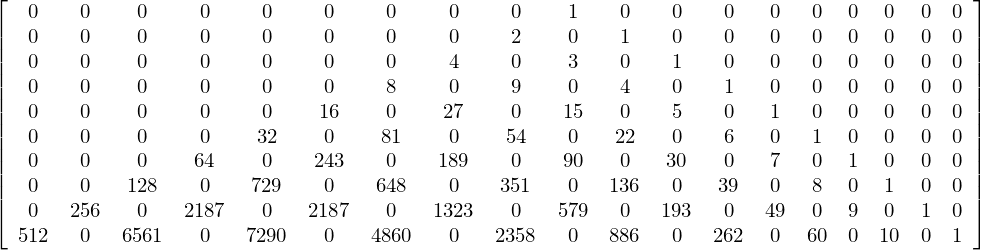

In [12]:
triangle = zeros(n, n*2-1)
for i in range(n):
    row = np.array(matrix[n-i-1, 0:n-i])
    temp = np.zeros((1, n*2-2*i-1), dtype=row.dtype)
    temp[:,::2] = row
    triangle[n-i-1, i:n*2-i-1] = temp
triangle

Osservando la matrice precedente possiamo confermare senza ombra di dubbio che i primi coefficienti centrali della matrice di Riordan considerata sono proprio 1, 3, 15, 90, 579, 3858, ... 